In [1]:
#importing neccessary packages...

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [2]:
#creating conectionwith the sqlite file
con = sqlite3.connect('final.sqlite') 

#Reading the entire data from the file and storing it into a dataframe...
data = pd.read_sql_query("select * from Reviews", con)
#data.head()

In [3]:
# sampling 5k positive and 5k negative review points and merging them into a single dataframe...
data1=data[data.Score=='positive'].sample(n=5000)
data2=data[data.Score=='negative'].sample(n=5000)
frames=[data1,data2]
final_data=pd.concat(frames)

In [4]:
final_data.shape

(10000, 12)

In [5]:
del data

In [6]:
# storing the "Score" feature into a separate variable...
label=final_data["Score"]


In [4]:
# Text to vector conversion..
# Creating bag of words on the cleaned Text...
#BoW
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final_data['CleanedText'].values)

In [8]:
final_tf_idf.shape

(10000, 13379)

In [8]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [9]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
print(standardized_data.shape)


(10000, 13379)


In [10]:

from sklearn.decomposition import TruncatedSVD


In [15]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=4000)
X_tsvd = tsvd.fit(standardized_data)

In [16]:
# List of explained variances 
tsvd.explained_variance_ratio_.sum()

0.83047111548416475

In [11]:
# running Tsvd only on 1000 components...
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, random_state=42)
tsvd_data1=svd.fit_transform(standardized_data)

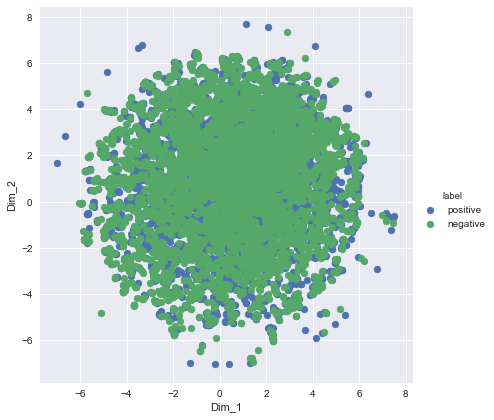

In [20]:

from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(tsvd_data1)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

In [12]:
# running Tsvd only on 4856 components...

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4845, random_state=42)
tsvd_data=svd.fit_transform(standardized_data)

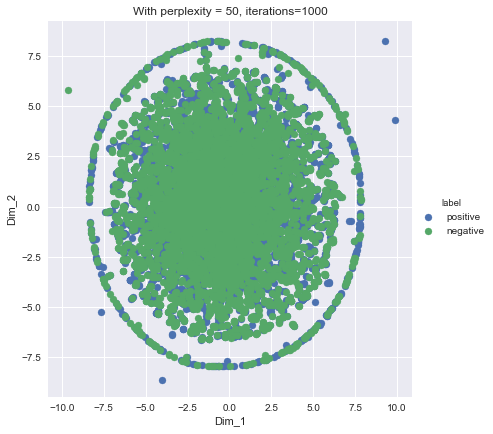

In [14]:
# TSNE

from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0, perplexity=50)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(tsvd_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=1000')
plt.show()

# Conclusion
The positive and negative points are completely overlapping each other so they are not separable at all...